In [45]:
import networkx as nx
import json
 
# manifest.jsonの読み込み
with open('manifest.json') as f:
    manifest = json.loads(f.read())
 
# networkx の Graphに変換
G = nx.DiGraph()
for node_id, node in manifest['nodes'].items():
    if node['resource_type'] != 'model':
        continue
    G.add_node(node['name'])
    for ref in node['refs']:
        G.add_edge(ref['name'], node['name'])
    for source in node['depends_on']['nodes']:
        if source.startswith('source'):
            G.add_edge(source.split('.')[3], node['name'])
 
 
def get_mediators(g, treatment, outcome):
    """get_mediators
 
          ┌     mediator    ┐
          |                 ↓
    treatment     --->     outcome
 
    こんな感じのDAG構造を想定して、treatmentとoutcomeを与えると、mediatorになっているノードを見つける
    """
    outcome_ancestors = set(G.predecessors(outcome)) |  set([outcome])
    treatment_descendants = set(G.successors(treatment))
    mediators = treatment_descendants.intersection(outcome_ancestors)
    if len(mediators) == 2:
        mediators.discard(outcome)
        mediator = mediators.pop()
 
        print(f"{treatment} -> {mediator} -> {outcome}")
 
# 下流ノードを探す
leafs = []
for node_id in G.nodes:
    if len(set(G.successors(node_id))) == 0:
        leafs.append(node_id)
 
# 全てのメディエータを取り出す
for leaf_node_id in leafs:
    for treatment in nx.ancestors(G, leaf_node_id):
        get_mediators(G, treatment, leaf_node_id)


stg_orders -> int_order_payments_pivoted -> orders
stg_payments -> int_order_payments_pivoted -> orders


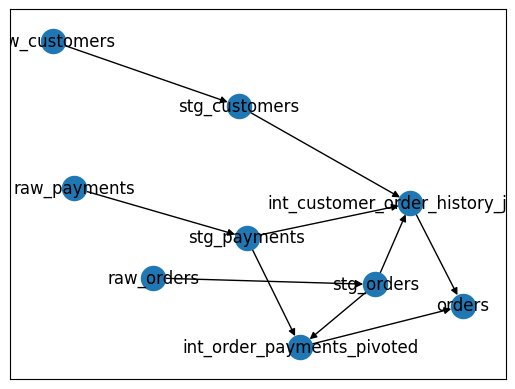

In [46]:
import matplotlib.pyplot as plt
import networkx as nx

nx.draw_networkx(G)
plt.show()

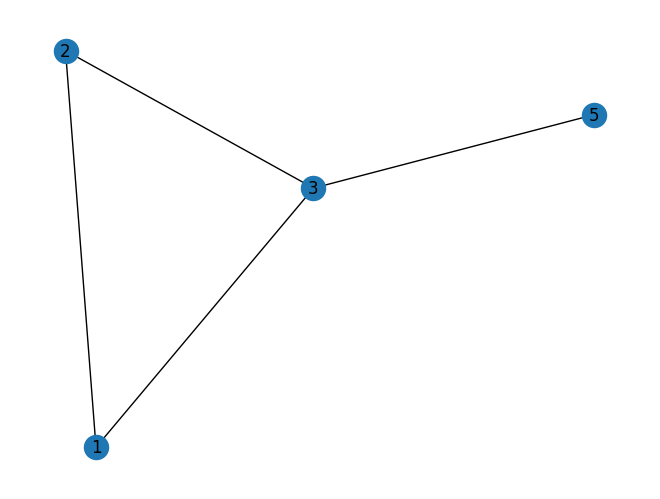

In [64]:
%matplotlib inline
import networkx as nx # NetworkXをインポート

G = nx.Graph()
# ネットワーク生成
G = nx.Graph([(1, 2), (2, 3), (3, 1)])

G.add_node(5)
G.add_edge(5,3)
# G.add_node(4)
# リンクの追加
# G.add_edge(1,4)

# n = [5, 6, 7]
# G.add_nodes_from(n)

# e = [(5,6), (3,7), (4,6)]
# G.add_edges_from(e)

# ノードの削除
# G.remove_node(4)
nx.draw(G, with_labels=True) # ラベルをTrueにして番号の可視化

In [66]:
import networkx as nx
import json

# Load manifest.json
with open('manifest.json') as f:
    manifest = json.loads(f.read())

# Convert to networkx Graph
G = nx.DiGraph()
for node_id, node in manifest['nodes'].items():
    if node['resource_type'] != 'model':
        continue
    G.add_node(node['name'])
    for ref in node['refs']:
        G.add_edge(ref['name'], node['name'])
    for source in node['depends_on']['nodes']:
        if source.startswith('source'):
            G.add_edge(source.split('.')[3], node['name'])


def get_mediators(g, treatment, outcome):
    """
    Get mediators

          ┌     mediator    ┐
          |                 ↓
    treatment     --->     outcome

    Assuming a DAG structure like this, given treatment and outcome,
    find the node acting as a mediator.
    """
    outcome_ancestors = set(G.predecessors(outcome)) | set([outcome])
    treatment_descendants = set(G.successors(treatment))
    mediators = treatment_descendants.intersection(outcome_ancestors)
    if len(mediators) == 2:
        mediators.discard(outcome)
        mediator = mediators.pop()

        print(f"{treatment} -> {mediator} -> {outcome}")

# Find leaf nodes
leafs = []
for node_id in G.nodes:
    if len(set(G.successors(node_id))) == 0:
        leafs.append(node_id)

# Extract all mediators
for leaf_node_id in leafs:
    for treatment in nx.ancestors(G, leaf_node_id):
        get_mediators(G, treatment, leaf_node_id)

stg_orders -> int_order_payments_pivoted -> orders
stg_payments -> int_order_payments_pivoted -> orders
base_table_1 -> int_table_1 -> mart_table
